# Step 0: Let's get some info of Haberman.

### Haberman's Survival Data Set:

#### Data Set Information:
#### The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

#### Attribute Information:

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
-- 1 = the patient survived 5 years or longer 
-- 2 = the patient died within 5 year


##### https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival

In [1]:
# Step 1: Import all the packages required.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")
# Step 2: #Load Iris.csv into a pandas dataFrame.
haberman_data = pd.read_csv("haberman_for_EDA_Assignment_1.csv")

In [2]:
# Step 3: Get the Rows and Columns of csv.data
haberman_row, haberman_column = (haberman_data.shape)
print("Rows are:", str(haberman_row))
print("Columns are:", str(haberman_column))

# Step 4: Get the dataset schema.
col_age = haberman_data.columns[0]
col_year = haberman_data.columns[1]
col_nodes = haberman_data.columns[2]
col_status = haberman_data.columns[3]

print("Dataset Columns are:",col_age,", ",col_year,", ",col_nodes,", ",col_status)
haberman_cols = [col_age,col_year,col_nodes,col_status]
print("Survival Status Probability:")
print("[Note: '1' is patient survived and '2' is died within 5 years.]")
haberman_data["status"].value_counts()

Rows are: 306
Columns are: 4
Dataset Columns are: age ,  year ,  nodes ,  status
Survival Status Probability:
[Note: '1' is patient survived and '2' is died within 5 years.]


1    225
2     81
Name: status, dtype: int64

# 1. Print 2D Scatter Plots:

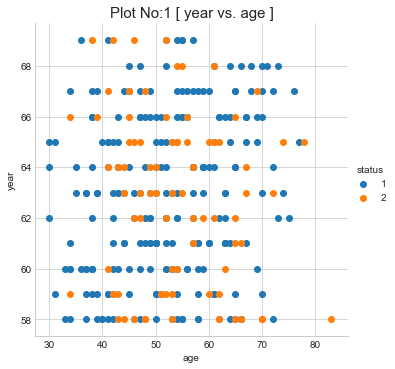

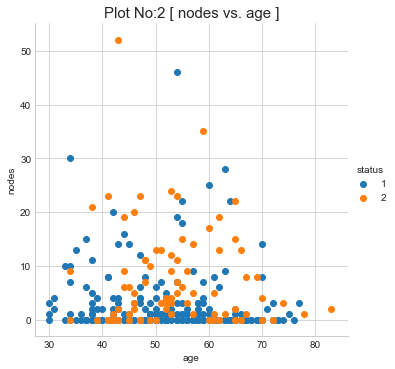

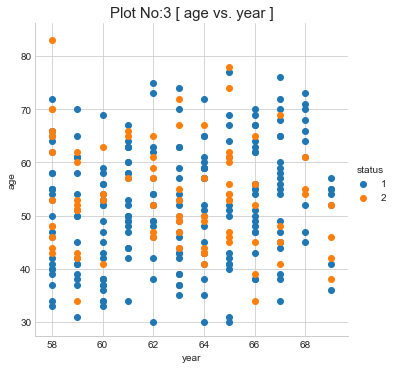

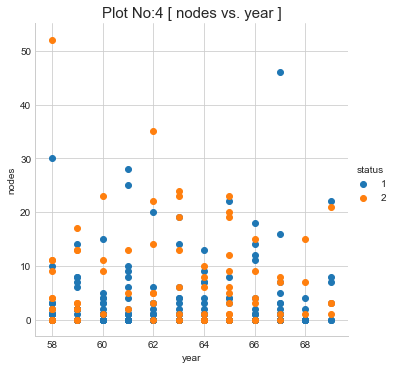

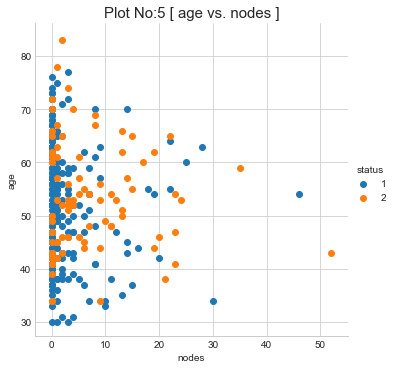

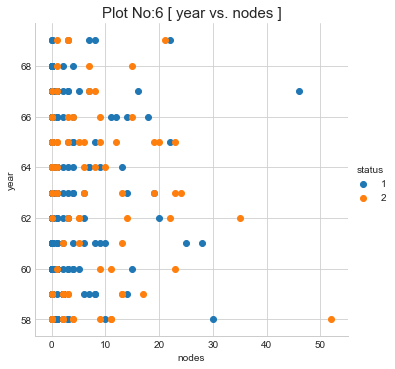

In [37]:
counter = 0
for row in haberman_cols:
    for col in haberman_cols:
        if (row == col) | (row == "status") | (col == "status"): continue
        else:
            counter += 1
            title = "Plot No:" + str(counter) + " [ " + str(col) + " vs. " + str(row) + " ]"
            sns.set_style("whitegrid");
            sns.FacetGrid(haberman_data, hue="status", size=5) \
            .map(plt.scatter, row, col) \
            .add_legend();
            plt.title(title, fontsize=15)
            plt.show();


## Conclusion:

### Plot No: 1 [ year  vs.  age ]
#### As per plot, there is no any relation between year and age of the patient in-order to get the clear status category. Color dots of both status are scattered so we can not get a clear cut isolation. We can add one point that between age 30 & 40, there are maximum blue dots means the status of survival is more.

### Plot No: 2 [ nodes  vs.  age ]
#### As per plot, there is no any relation between nodes and age of the patient in-order to get the clear status category. We can add one more point that in the lower left square block of age 30 - 40 & nodes 0 - 10, there are only 3 visible dots which also tells that in this conditions there is more survival.

### Plot No: 3 [ age  vs.  year ]
#### Same as above plot 1. Also there is one more point that between age 30 - 40 there are hardly 4 orange dots across all years which is nothing but more survival. Also there is 100 % survuval when age is 30 - 40 and year of operation is between mid of 1959 & mid of 1965.

### Plot No: 4 [ nodes  vs.  year ]
#### This plot is scattered so at this moment there is no any co relation between axillary nodes detected and year of operation. There is slight curve observed where dots (number of operations) are getting increased from 1958 to 1962 and then getting decreased bit but later same count after 1968. Survival of patients is more (dense blue dots) when nodes are between 0 to 10 and year of operation is 1960 to 1961.

### Plot No: 5 [ age  vs.  nodes ]
#### Same as above plot 2.

### Plot No: 6 [ year  vs.  nodes ]
#### Same as above plot 4.


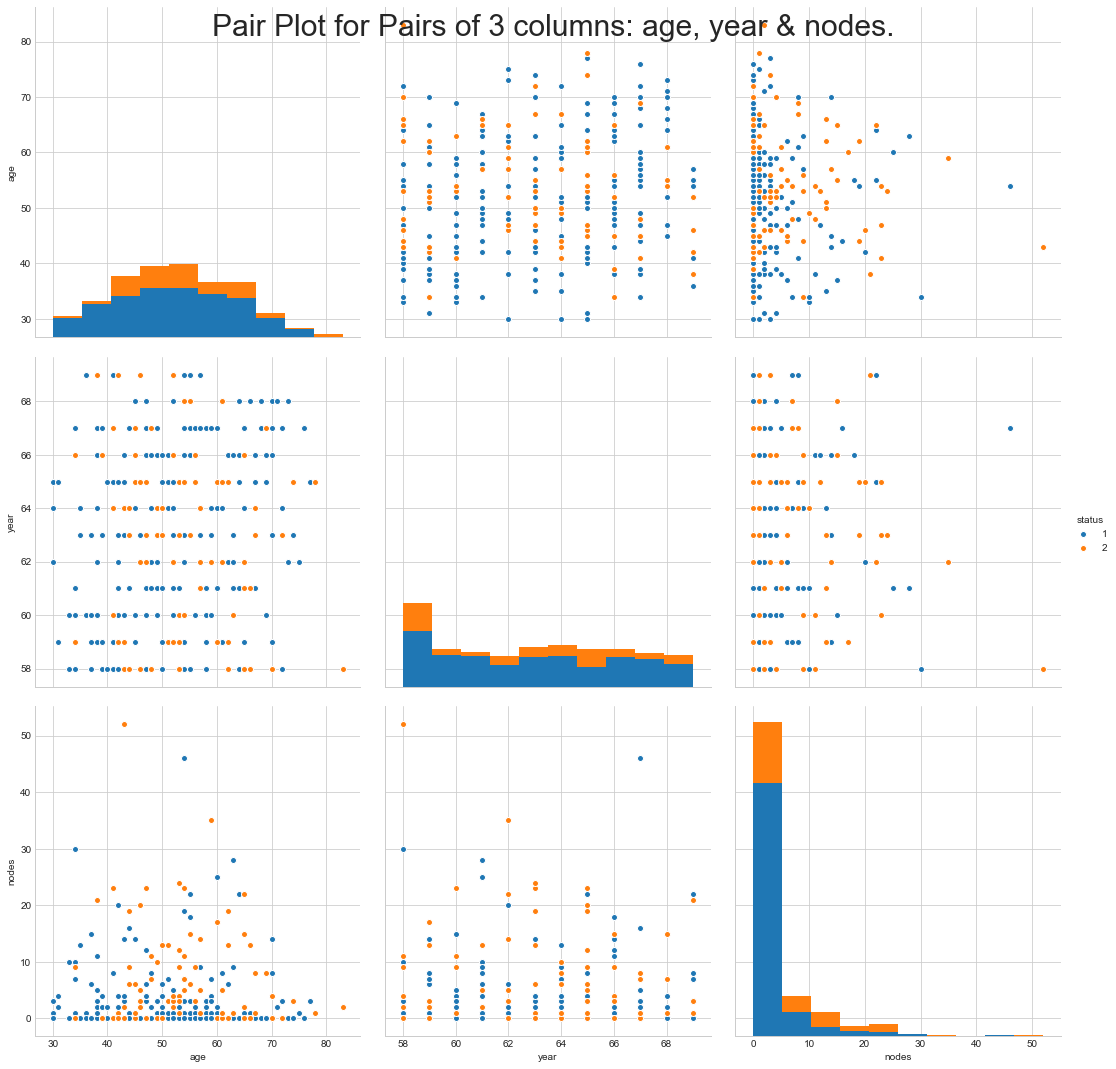

In [50]:
sns.set_style("whitegrid");
sns.pairplot(haberman_data, vars = ['age','year','nodes'], hue="status", size=5);
plt.suptitle("Pair Plot for Pairs of 3 columns: age, year & nodes.", fontsize=30)
plt.show()

## Conclusion:
### Unlike the Iris data, here 2D plots are not giving more clarity with status of the patient's survival after 5 years. Let's check whether Univariant or multivariant are helping to understand the data.

# 2. Histogram, PDF, CDF

## 2.1 Plot 1-D across all the variable:

### A] When patient survived 5 years or longer

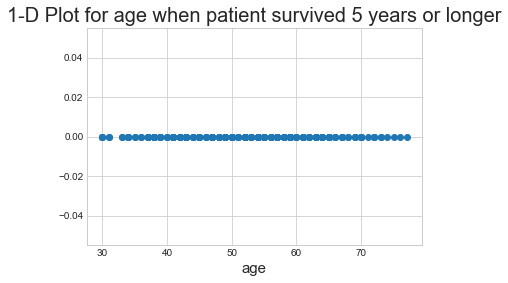

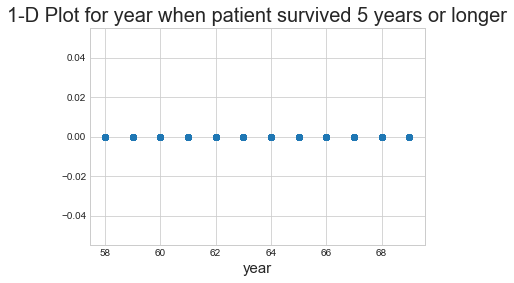

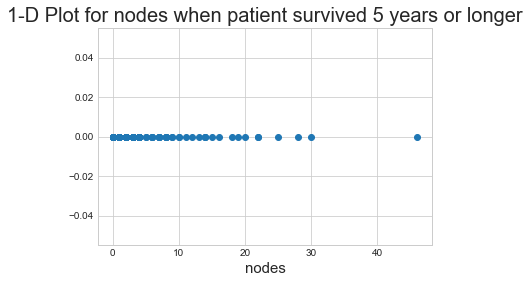

In [44]:
import numpy as np
for col in haberman_cols:
    if col == "status": continue
    title = "1-D Plot for " + str(col) + " when patient survived 5 years or longer"
    col_d = haberman_data.loc[haberman_data["status"] == 1];
    plt.plot(col_d[col], np.zeros_like(col_d[col]), 'o')
    plt.title(title, fontsize=20)
    plt.xlabel(col, fontsize=15)
    # plt.ylabel('ylabel', fontsize=10)
    plt.show()

## Conclusion:
1. 1-D Plot for age says that for survived patient's age is between 30 & 80 the operations are recorded. We can use PDF & CDF to get detail insights.
2. 1-D Plot for year is not that useful since data is equally distributed.
3. 1-D Plot for nodes says that there is maxium survival when axillary nodes detedcted are less. The one after 40 looks either exceptional or corrupted data.

### B] When patient died within 5 year

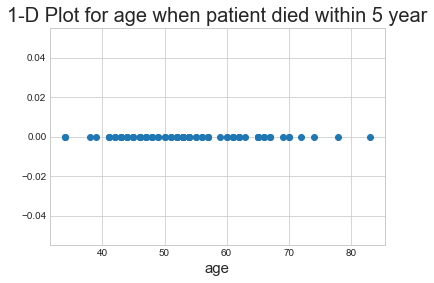

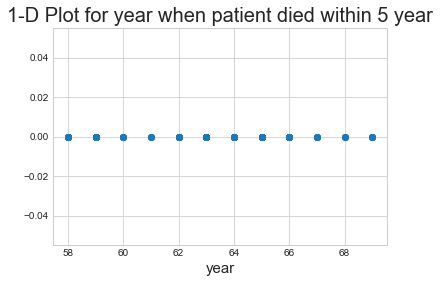

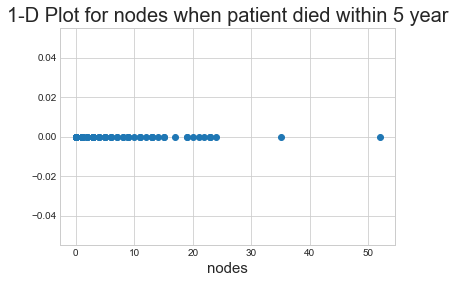

In [45]:
import numpy as np
for col in haberman_cols:
    if col == "status": continue
    title = "1-D Plot for " + str(col) + " when patient died within 5 year"
    col_d = haberman_data.loc[haberman_data["status"] == 2];
    plt.plot(col_d[col], np.zeros_like(col_d[col]), 'o')
    plt.title(title, fontsize=20)
    plt.xlabel(col, fontsize=15)
    # plt.ylabel('ylabel', fontsize=10)
    plt.show()

## Conclusion:
1. 1-D Plot for age says that for survived patient's age is between 35 & 80 the operations are recorded. We can use PDF & CDF to get detail insights.
2. 1-D Plot for year is not that useful since data is equally distributed.
3. 1-D Plot for nodes says that there is maxium survival when axillary nodes detedcted are less. The one after 30 age i.e. one at 35 and one at 52 looks either exceptional or corrupted data.

## 2.3 Histogram & PDF

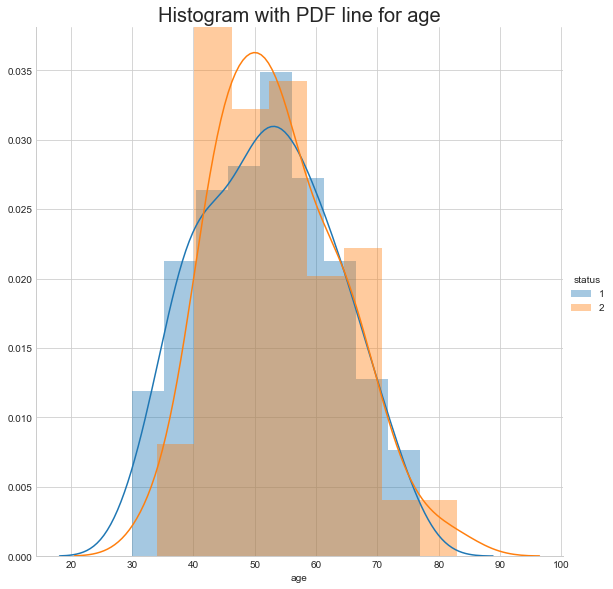

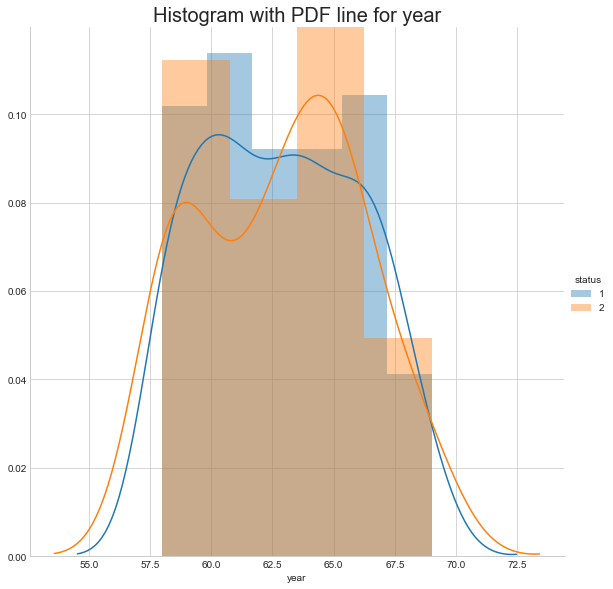

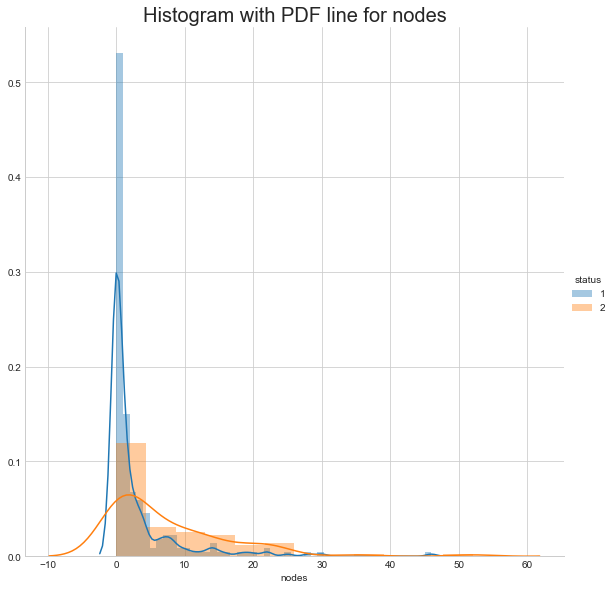

In [51]:
for col in haberman_cols:
    if col == "status": continue
    title = "Histogram with PDF line for " + str(col)
    sns.FacetGrid(haberman_data, hue="status", size=8) \
   .map(sns.distplot, col) \
   .add_legend();    
    plt.title(title, fontsize=20)
    plt.show();

## Conclusion:
1. Plot 1: Age with Histogram and PDF line gives info:
    1.1 From zero till age of 40, the blue line is high i.e. the count of patients survived 5 is higher than patient died.
    1.2 After age of 40, the the orange line is high 56-57 age and later almost same as blue line. This indicates that when age is between 40 & 56 the chances of death are higher and later after 57 age they are same.
2. Plot 2: year of operation with Histogram and PDF line gives info:
    2.1 It is expected that with years of experience in surgery or operation, chances of survival should be increased but here it doesn't seems like that.
    2.2 From mid of year 1958 till 1963, the operated patients were survived. But against which factor is not known.
3. Plot 3: axillary nodes with Histogram and PDF line gives info:
    3.1 When Number of positive axillary nodes detected are least (equal or less than 1) the success rate is more.
    3.2 When Number of positive axillary nodes detected are more than 3 then the rate of patient died is getting increases.

So we can rely on positive axillary nodes for further data analysis since here the separation of PDF line and Histogram well as compare to other plots.

## 2.4 PDF VS CDF

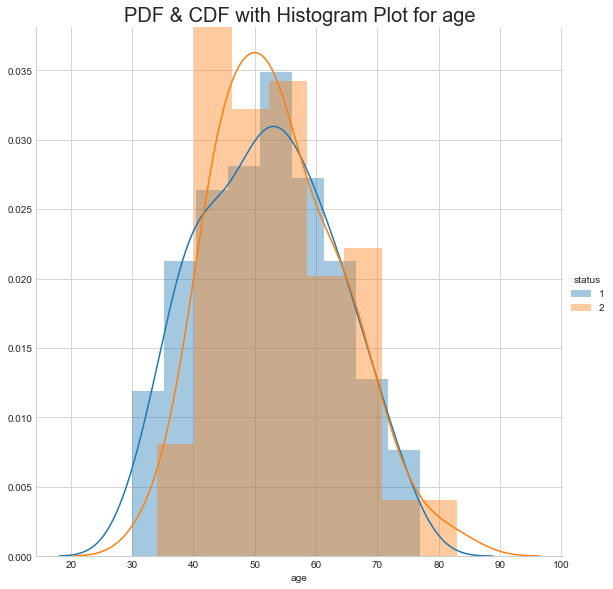

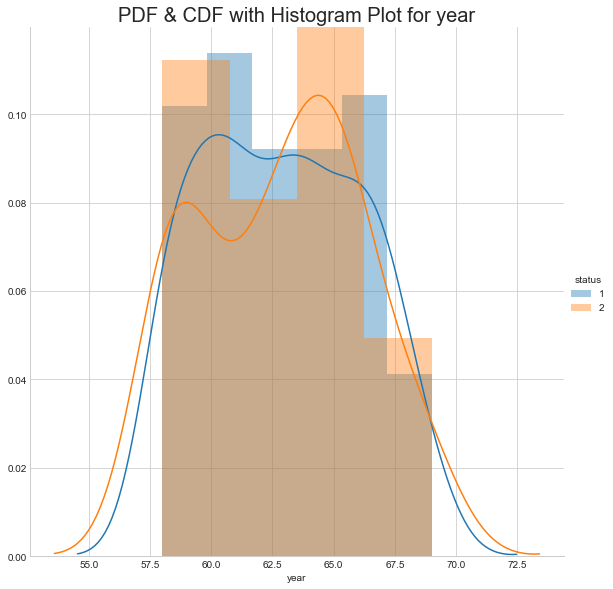

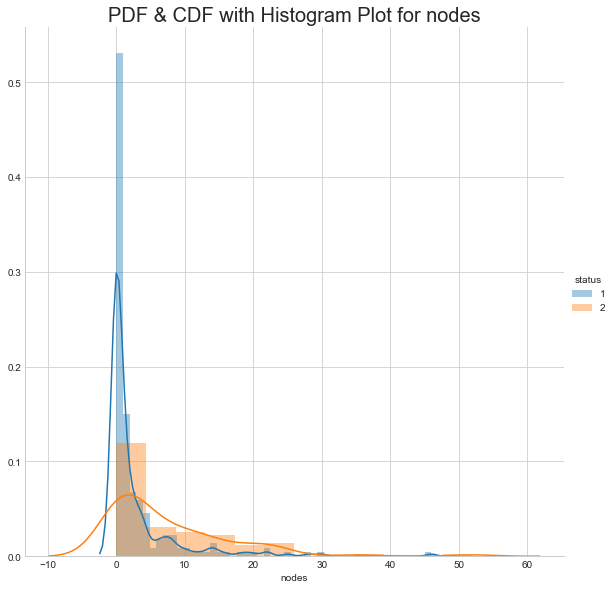

In [53]:
for col in haberman_cols:
    if col == "status": continue
    title = "PDF & CDF with Histogram Plot for " + str(col)
    sns.FacetGrid(haberman_data, hue="status", size=8) \
   .map(sns.distplot, col) \
   .add_legend();
    plt.title(title, fontsize=20)
    # plt.xlabel(col, fontsize=15)
    # plt.ylabel('ylabel', fontsize=10)
    plt.show();

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


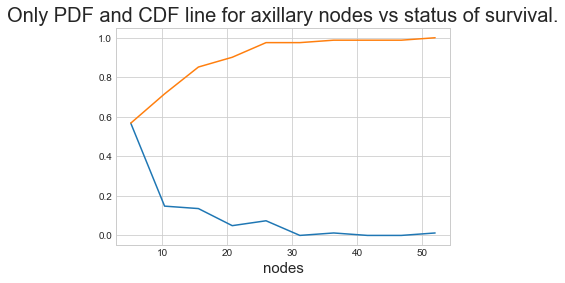

In [56]:
col_d = haberman_data.loc[haberman_data["status"] == 2];

counts, bin_edges = np.histogram(col_d['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
title = "Only PDF and CDF line for axillary nodes vs status of survival."
plt.title(title, fontsize=20)
plt.xlabel('nodes', fontsize=15)
# plt.ylabel('ylabel', fontsize=10)
plt.show();

## Conclusion:
1. If we see the above plot, the 56-57 % patients survived when Number of positive axillary nodes detected are between 5 & 8.
2. Later the blue line i.e. pecentage of people survived is 1% after 30 nodes.
3. If we check the orange line, percentage of patient dies is getting increased and when nodes are 21 it is 95% incresed to 99% when nodes are 25 or more.

# 3. Mean and Std. Dev. VS Median and MAD

In [109]:
#Mean, Variance, Std-deviation,  
col_lived = haberman_data.loc[iris["status"] == 1];
col_died = haberman_data.loc[iris["status"] == 2];

print("          | People Survived    | People Died")
print("---------------------------------------------------------------------------")
print("Means     |", np.mean(col_lived["nodes"]), "|", np.mean(col_died["nodes"]))
print("Std-dev   |", np.std(col_lived["nodes"]), " |", np.std(col_died["nodes"]))

print("Median    |", np.median(col_lived["nodes"]), "               |", np.median(col_died["nodes"]))

from statsmodels import robust
print("MAD       |", robust.mad(col_lived["nodes"]), "               |", robust.mad(col_died["nodes"]))

          | People Survived    | People Died
---------------------------------------------------------------------------
Means     | 2.7911111111111113 | 7.45679012345679
Std-dev   | 5.857258449412131  | 9.128776076761632
Median    | 0.0                | 4.0
MAD       | 0.0                | 5.930408874022408


## Conclusion:
1. As per conclusion from section 2.1, there are few observations where we found out that there are some exceptional points in scatter plot against nodes and this is why the mean is different than the median of both range of patient survived & died.
2. Mean of Patient Survived is 2.79 and Patient Died is 7.4, so in whole operation of cancer patient survived with low probability.
3. If we compare the conclusion of section 2.3 PDF VS CDF, here the Std. Dev is 5.86 low which is not that wider as compare to std. dev 9.13 for Patient Died.
4. Above Median numbers clearly say that those are having zero Number of positive axillary nodes detected are survived and four nodes are causing death.
5. Similar to above point 3, we can see the blue histogram is higher with high PDF line when nodes are Zero with very thin width which is clear by MAD number (Median Absolute Deviation).
6. Also, in same plot when you compare the ornage histogram with orange PDF (Probability Density Fun), Median 4.0 with MAD 5.93 satifies.

# 4. Percentile & Quantile

In [150]:
col_lived = haberman_data.loc[iris["status"] == 1];
col_died = haberman_data.loc[iris["status"] == 2];

print("\nQuantiles:")
print(np.percentile(col_lived["nodes"],np.arange(0, 100, 20)))
print(np.percentile(col_died["nodes"],np.arange(0, 100, 20)))

print("\n90th Percentiles:")
print(np.percentile(col_lived["nodes"],90))
print(np.percentile(col_died["nodes"],90))

print("\nDifferent Percentiles:")
print("Survived 51%:",np.percentile(col_lived["nodes"],51))
print("Survived 53%:",np.percentile(col_lived["nodes"],53))
print("Died 22%:",np.percentile(col_died["nodes"],22))
print("Died 24%:",np.percentile(col_died["nodes"],24))


Quantiles:
[0. 0. 0. 1. 4.]
[ 0.  0.  3.  6. 13.]

90th Percentiles:
8.0
20.0

Different Percentiles:
Survived 51%: 0.0
Survived 53%: 1.0
Died 22%: 0.0
Died 24%: 1.0


# Conclusion:
1. From above Quantiles which we divied in 5 equal sections for better difference (0% is included):
    1.1 First 40% patient which are survived had zero nodes, then next 20% needs 1 node and remaining 20% had 4 nodes.
    1.2 First 20% patient which are died had zero nodes, next 20% had 3 nodes and remaining are increasing as 6 & 13 with 20%.
2. From 90th Percentiles we can see that 8 or more nodes patients survived and 20 nodes patients are dead.
3. In order to get the clear idea that at what percentage there is change in Survived and Dead patient we tried and tested few numbers and came to these 2 numbers of % per status.
    3.1 When % increased from 51 to 53 then there is change of 1 node for people which are survived.
    3.2 When % increased from 22 to 24 then there is change of 1 node for people which are died.

# 5. Box plot & Violin

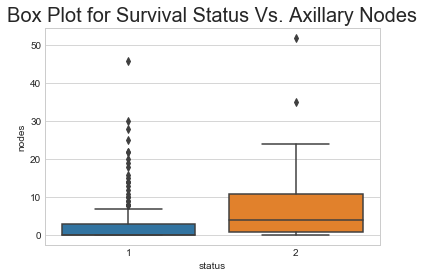

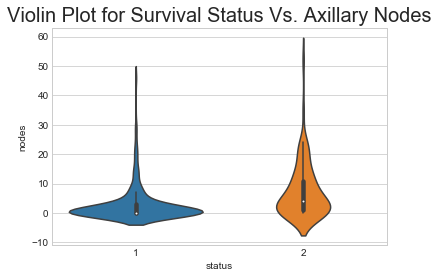

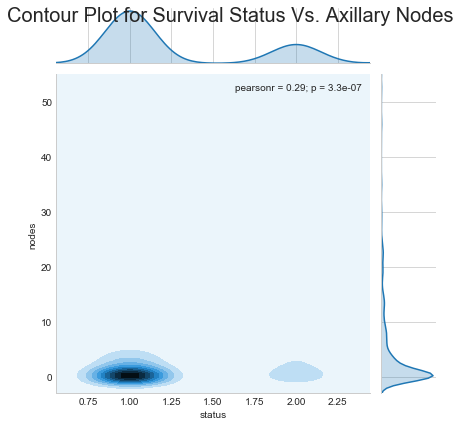

Patient Survived 0%. 25%. 50%. 75%.: [0. 0. 0. 3.]
Patient Died     0%. 25%. 50%. 75%.: [ 0.  1.  4. 11.]


In [66]:
col_lived = haberman_data.loc[haberman_data["status"] == 1];
col_died = haberman_data.loc[haberman_data["status"] == 2];

sns.boxplot(x='status',y='nodes', data=haberman_data)
plt.title('Box Plot for Survival Status Vs. Axillary Nodes', fontsize=20)
plt.show()

sns.violinplot(x="status", y="nodes", data=haberman_data, size=10)
plt.title('Violin Plot for Survival Status Vs. Axillary Nodes', fontsize=20)
plt.show()

sns.jointplot(x="status", y="nodes", data=haberman_data, kind="kde");
plt.suptitle('Contour Plot for Survival Status Vs. Axillary Nodes', fontsize=20)
plt.show();

print("Patient Survived 0%. 25%. 50%. 75%.:",np.percentile(col_lived["nodes"],np.arange(0, 100, 25)))
print("Patient Died     0%. 25%. 50%. 75%.:",np.percentile(col_died["nodes"],np.arange(0, 100, 25)))

## Conclusion
1. Here height of the box is nothing but 25th to 75th percentile. To clarify this, please check the below numbers of percentile.
2. Box in blue color says that when nodes are from zero to 3, then more patients were survived.
3. Box in orange color says that when nodes are from one to 11, then more patients were died.
4. Points far away from whiskers looks like corruption or unexpected data.
5. Violin shape plots are giving the density of the count of nodes. For Blue Violin which is for Patient which are survived, the density is huge when nodes are zeo and getting decreases very faster as nodes are getting increased whereas for orange violin which is in orange color, the density is more then nodes are 3 or 4 and it is getting decreased in upper direction very slowly as the count of nodes is getting increased.
6. To cont. with above density point we can see clearly get it in above countor plot. The darker eliptical shape plot above 1.00 on status bar is more dark and becoming faint very slowly and with many layers. This said that its more dense when the node is zero and getting bright as nodes are increasing. The right side eliptical shape is for patients which are dead. Here density is low but the color is same i.e. very less number of layers.
